# Assesment:1

#Concepts and Technologies of AI-5CS037

#Analysis of the Human Development Index (HDI):A Data - Driven Exploration of Global and Regional Development Patterns.

# SUBMITTED BY: KRISHA SHRESTHA
# Student ID: 240085

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Dataset with encoding fix
file_path = "/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/Human_Development_Index_Dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')  # encoding fix


In [ ]:
# Checking first rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

# Problem 1A - – Single Year HDI Exploration

In [ ]:
# Task 1
# Filtering latest year (2022)
hdi_2022_df = df[df['year'] == 2022].copy()

In [ ]:
# Task 2
# Exploring data
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [ ]:
# Task 3
#Missing Values & Data cleaning
# Converting numeric columns
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce')
hdi_2022_df['life_expectancy'] = pd.to_numeric(hdi_2022_df['life_expectancy'], errors='coerce')

In [ ]:
# Dropping duplicates and missing HDI
hdi_2022_df = hdi_2022_df.drop_duplicates()
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])

In [ ]:
# Task 4
# Basic statistics
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

highest = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
lowest = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]

print("Mean HDI:", mean_hdi)
print("Median HDI:", median_hdi)
print("Std HDI:", std_hdi)
print("Highest HDI:", highest['country'], highest['hdi'])
print("Lowest HDI:", lowest['country'], lowest['hdi'])

Mean HDI: 0.7228872549019609
Median HDI: 0.7395
Std HDI: 0.15302880386427825
Highest HDI: Switzerland 0.967
Lowest HDI: Somalia 0.38


In [ ]:
# Task 5
# Filtering HDI > 0.8 and sort by GNI
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.8]
high_hdi_sorted = high_hdi.sort_values(by='gross_inc_percap', ascending=False)
high_hdi_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI_Category
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN,Very High
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912,Very High
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508,Very High
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467,Very High
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903,Very High
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632,Very High
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913,Very High
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515,Very High
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498,Very High
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN,Very High


In [ ]:
# Task 6
# Adding HDI Category
def categorize_hdi(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi < 0.700:
        return 'Medium'
    elif hdi < 0.800:
        return 'High'
    else:
        return 'Very High'

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

In [ ]:
#Saving CSV File
save_path = "/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_category_added.csv"
hdi_2022_df.to_csv(save_path, index=False)

#Problem 1B -HDI Trend Analysis (2020–2022)

In [ ]:
#Task1
# Filtering years 2020, 2021, 2022
hdi_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()

In [ ]:
#Task2
#Data Cleaning
# Cleaning numeric columns
hdi_2020_2022['hdi'] = pd.to_numeric(hdi_2020_2022['hdi'], errors='coerce')
hdi_2020_2022['gross_inc_percap'] = pd.to_numeric(hdi_2020_2022['gross_inc_percap'], errors='coerce')
hdi_2020_2022['life_expectancy'] = pd.to_numeric(hdi_2020_2022['life_expectancy'], errors='coerce')
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()
hdi_2020_2022 = hdi_2020_2022.dropna(subset=['hdi'])

In [ ]:
#Saving CSV File
hdi_2020_2022.to_csv("/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_problem1B.csv", index=False)

In [ ]:
#Adding Region Column for analysis

south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman","Palestine",
               "Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

def assign_region(country):
    if country in south_asia:
        return "South Asia"
    elif country in middle_east:
        return "Middle East"
    else:
        return "Other"

hdi_2020_2022['region'] = hdi_2020_2022['country'].apply(assign_region)

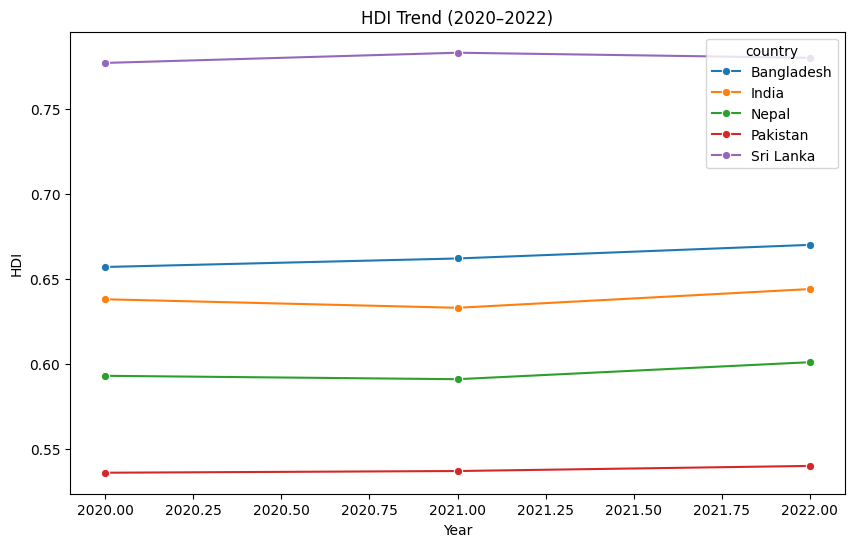

In [ ]:
#Task 3:
# Visualization 1: Line Chart for 5 countries

countries = ['India', 'Nepal', 'Bangladesh', 'Sri Lanka', 'Pakistan']
subset = hdi_2020_2022[hdi_2020_2022['country'].isin(countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trend (2020–2022)')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()

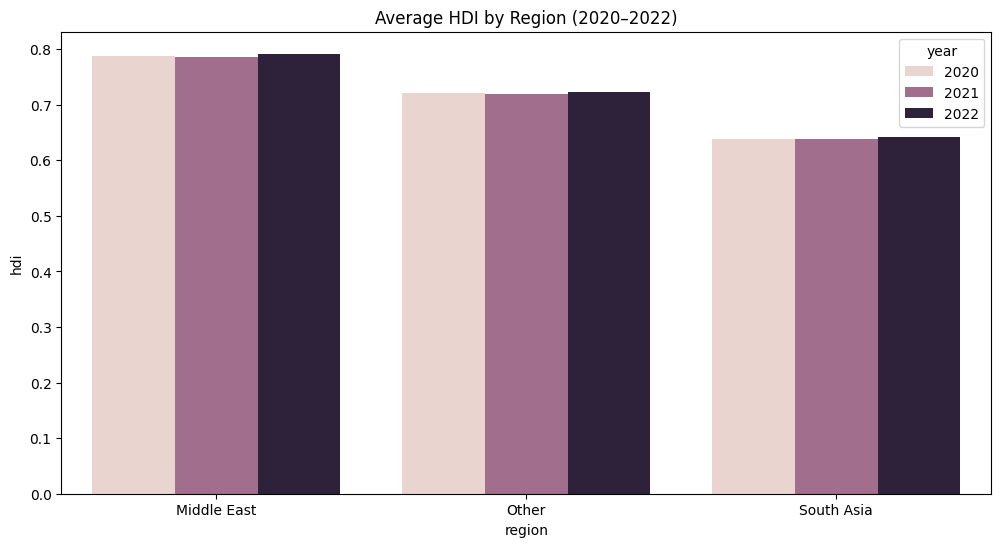

In [ ]:
# Visualization 2: Bar Chart - Average HDI by Region

region_avg = hdi_2020_2022.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=region_avg, x='region', y='hdi', hue='year')
plt.title('Average HDI by Region (2020–2022)')
plt.show()

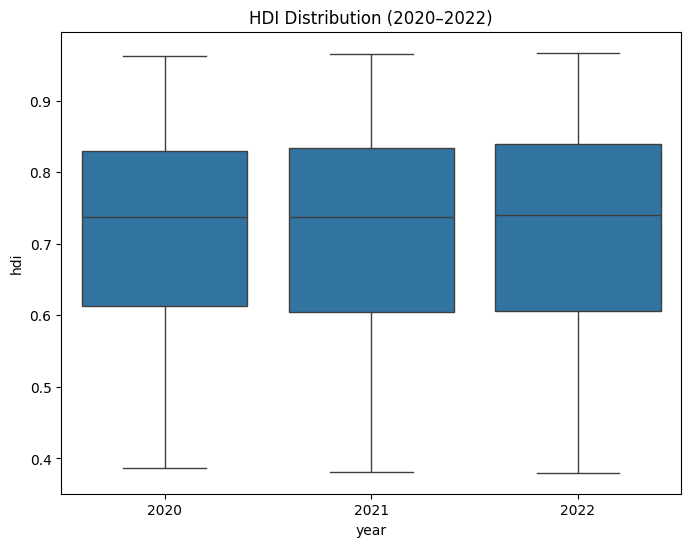

In [ ]:
# Visualization 3: Box Plot HDI Distribution

plt.figure(figsize=(8,6))
sns.boxplot(data=hdi_2020_2022, x='year', y='hdi')
plt.title('HDI Distribution (2020–2022)')
plt.show()

In [ ]:
# Checking if GNI per Capita column exists
if 'GNI_per_capita' in df.columns:
    # Converting to numeric (sometimes numbers are stored as text)
    df['GNI_per_capita'] = pd.to_numeric(df['GNI_per_capita'], errors='coerce')
    df['hdi'] = pd.to_numeric(df['hdi'], errors='coerce')

    # Dropping rows with missing HDI or GNI values
    df = df.dropna(subset=['hdi', 'GNI_per_capita'])
else:
    print("GNI per Capita variable not available in the dataset.")


GNI per Capita variable not available in the dataset.


In [ ]:
#Task 4
# Computing HDI change from 2020 to 2022
hdi_pivot = hdi_2020_2022.pivot(index='country', columns='year', values='hdi')
hdi_pivot['Change_2020_2022'] = hdi_pivot[2022] - hdi_pivot[2020]

# Countries with greatest improvement
top_improve = hdi_pivot['Change_2020_2022'].sort_values(ascending=False).head(5)
print("Top 5 countries with HDI improvement:\n", top_improve)

# Countries with decline
decline = hdi_pivot[hdi_pivot['Change_2020_2022'] < 0]
print("Countries with HDI decline:\n", decline)

# Average HDI by region
region_avg_total = hdi_2020_2022.groupby('region')['hdi'].mean().sort_values()
print("Region with lowest average HDI:", region_avg_total.index[0])
print("Region with highest average HDI:", region_avg_total.index[-1])


Top 5 countries with HDI improvement:
 country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: Change_2020_2022, dtype: float64
Countries with HDI decline:
 year                               2020   2021   2022  Change_2020_2022
country                                                                
Afghanistan                       0.488  0.473  0.462            -0.026
Angola                            0.594  0.590  0.591            -0.003
Australia                         0.948  0.949  0.946            -0.002
Belize                            0.705  0.698  0.700            -0.005
Brunei Darussalam                 0.827  0.824  0.823            -0.004
Bulgaria                          0.802  0.796  0.799            -0.003
Burkina Faso                      0.446  0.445  0.438            -0.008
Central African Republic          0.389  0.387  0.387            -0.002
Chad                              0.396  0.393  0.394            

# Problem 2: Advanced HDI Exploration

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Loading full dataset
file_path = "/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_problem1B.csv"
hdi_df = pd.read_csv(file_path)

In [ ]:
# Ensuring numeric columns
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']
for col in numeric_cols:
    hdi_df[col] = pd.to_numeric(hdi_df[col], errors='coerce')

In [ ]:
# Task 1
# Creating South Asia Subset
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filtering dataset for South Asia
sa_df = hdi_df[hdi_df['country'].isin(south_asia_countries)]

# Saving the subset to CSV
sa_df.to_csv("/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_SouthAsia.csv", index=False)

print("South Asia subset saved as HDI_SouthAsia.csv")


South Asia subset saved as HDI_SouthAsia.csv


In [ ]:
#Task 2
# Composite Development Score
sa_df['Composite_Score'] = 0.30 * sa_df['life_expectancy'] + 0.30 * sa_df['gross_inc_percap']

In [ ]:
# Ranking countries by Composite Score
sa_ranked = sa_df.groupby('country')['Composite_Score'].mean().sort_values(ascending=False)
print("\nComposite Score Ranking (South Asia):")
print(sa_ranked)


Composite Score Ranking (South Asia):
country
Maldives       4827.657597
Sri Lanka      3767.752918
Bhutan         3097.787317
India          1978.776712
Bangladesh     1877.251264
Pakistan       1565.030032
Nepal          1191.338108
Afghanistan     504.358088
Name: Composite_Score, dtype: float64


In [ ]:
# Comparing with HDI ranking
sa_hdi_ranked = sa_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
print("\nHDI Ranking (South Asia):")
print(sa_hdi_ranked)


HDI Ranking (South Asia):
country
Sri Lanka      0.780000
Maldives       0.750667
Bhutan         0.677667
Bangladesh     0.663000
India          0.638333
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64


/tmp/ipython-input-490570390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_composite.values, y=top5_composite.index, palette='viridis')


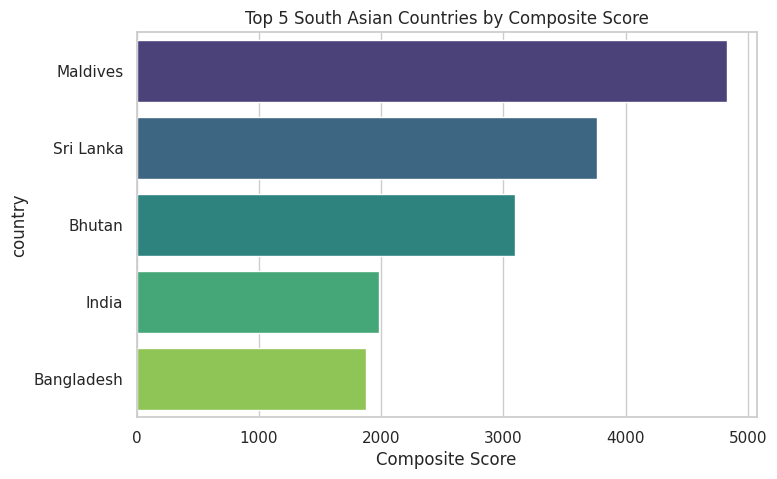

In [ ]:
# Plotting top 5 countries by Composite Score
top5_composite = sa_ranked.head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top5_composite.values, y=top5_composite.index, palette='viridis')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.show()

In [ ]:
#Task 3
# Outlier Detection (Using 1.5 x IQR)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[col] < lower) | (df[col] > upper)]

In [ ]:
# HDI outliers
hdi_outliers = detect_outliers(sa_df, 'hdi')
print("\nHDI Outliers:")
print(hdi_outliers[['country','hdi']])


HDI Outliers:
Empty DataFrame
Columns: [country, hdi]
Index: []


In [ ]:
# GNI per capita outliers
gni_outliers = detect_outliers(sa_df, 'gross_inc_percap')
print("\nGNI per Capita Outliers:")
print(gni_outliers[['country','gross_inc_percap']])


GNI per Capita Outliers:
Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


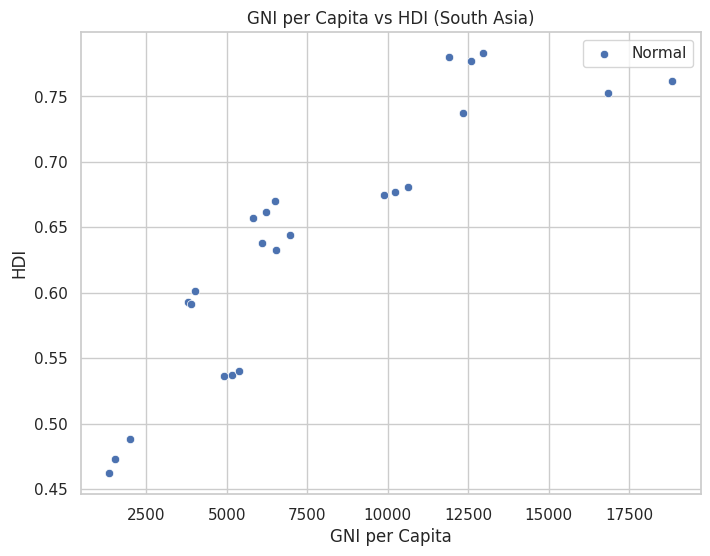

In [ ]:
# Scattering plot: GNI vs HDI with outliers highlighted
plt.figure(figsize=(8,6))
sns.scatterplot(data=sa_df, x='gross_inc_percap', y='hdi', label='Normal')
sns.scatterplot(data=gni_outliers, x='gross_inc_percap', y='hdi', color='red', label='Outliers')
plt.title("GNI per Capita vs HDI (South Asia)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.legend()
plt.show()


Correlation of gender_development with HDI: 0.874


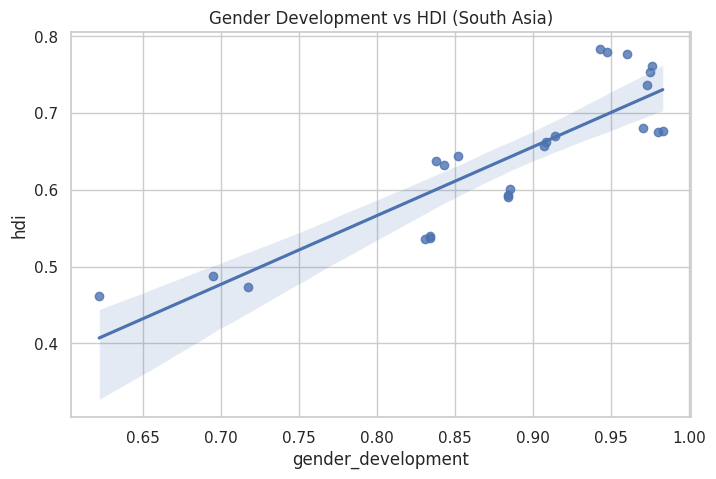


Correlation of life_expectancy with HDI: 0.939


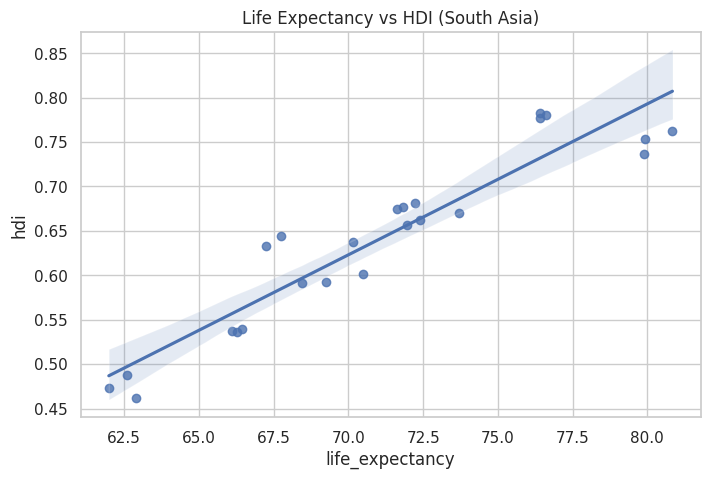

In [ ]:
#Task 4
#  Exploring Metric Relationships
metrics = ['gender_development','life_expectancy']
for metric in metrics:
    correlation = sa_df[[metric,'hdi']].corr().iloc[0,1]
    print(f"\nCorrelation of {metric} with HDI: {correlation:.3f}")

    # Scatter plot with trendline
    plt.figure(figsize=(8,5))
    sns.regplot(data=sa_df, x=metric, y='hdi')
    plt.title(f"{metric.replace('_',' ').title()} vs HDI (South Asia)")
    plt.show()

In [ ]:
#Task 5
# GNI-HDI Gap Analysis
sa_df = sa_df.copy()  # first make a copy to avoid modifying the slice

sa_df.loc[:, 'GNI_HDI_Gap'] = sa_df['gross_inc_percap'] - sa_df['hdi']

In [ ]:
# Top 3 positive gaps
top_positive_gap = sa_df.sort_values('GNI_HDI_Gap', ascending=False).head(3)
print("Top 3 Positive GNI-HDI Gaps:\n", top_positive_gap[['country', 'GNI_HDI_Gap']])


Top 3 Positive GNI-HDI Gaps:
        country  GNI_HDI_Gap
317   Maldives  18846.03019
316   Maldives  16856.85246
488  Sri Lanka  12958.03926


In [ ]:
# Top 3 negative gaps
top_negative_gap = sa_df.sort_values('GNI_HDI_Gap', ascending=True).head(3)
print("\nTop 3 Negative GNI-HDI Gaps:\n", top_negative_gap[['country', 'GNI_HDI_Gap']])


Top 3 Negative GNI-HDI Gaps:
        country  GNI_HDI_Gap
2  Afghanistan  1334.743733
1  Afghanistan  1533.662377
0  Afghanistan  1986.315772


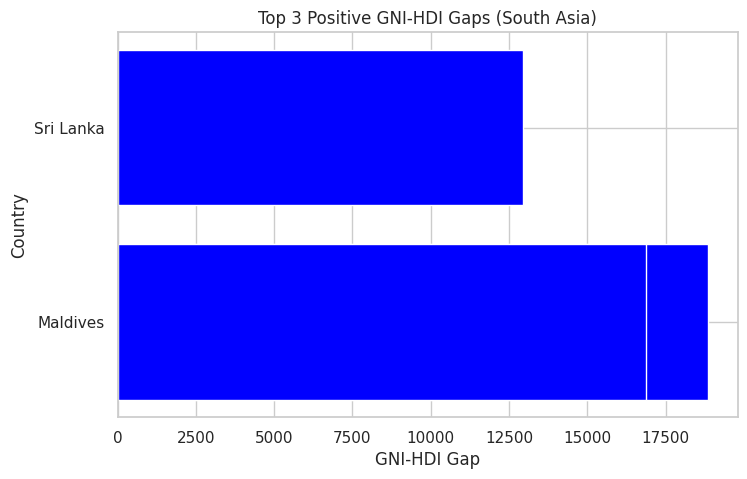

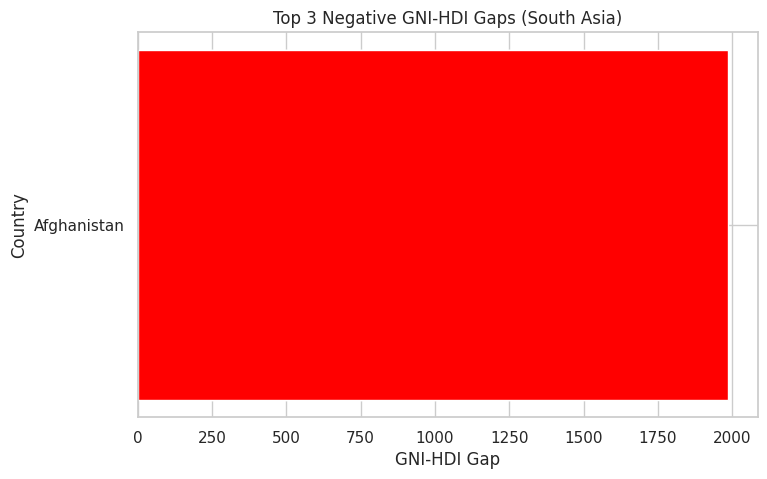

In [ ]:
# Plots
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top_positive_gap['country'], top_positive_gap['GNI_HDI_Gap'], color='blue')
plt.title("Top 3 Positive GNI-HDI Gaps (South Asia)")
plt.xlabel("GNI-HDI Gap")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(8,5))
plt.barh(top_negative_gap['country'], top_negative_gap['GNI_HDI_Gap'], color='red')
plt.title("Top 3 Negative GNI-HDI Gaps (South Asia)")
plt.xlabel("GNI-HDI Gap")
plt.ylabel("Country")
plt.show()

# Problem 3: Comparative Regional Analysis: South Asia vs Middle East

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_problem1B.csv")

In [ ]:
# Stripping extra spaces in column names
df.columns = df.columns.str.strip()


In [ ]:
#Task 1
#Regional Subsets
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
                         "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
sa_df = df[df['country'].isin(south_asia_countries)]
me_df = df[df['country'].isin(middle_east_countries)]


In [ ]:
# Keepping last year entry if duplicates exist
sa_df = sa_df.sort_values('year').drop_duplicates(subset='country', keep='last')
me_df = me_df.sort_values('year').drop_duplicates(subset='country', keep='last')

In [ ]:
#Saving CSV File
hdi_south_asia_2020_2022.to_csv("/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middle_east_2020_2022.to_csv("/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_MiddleEast_2020_2022.csv", index=False)

In [ ]:
#Task 2
# Descriptive Statistics
print("South Asia - HDI Mean:", sa_df['hdi'].mean())
print("South Asia - HDI Std:", sa_df['hdi'].std())

print("Middle East - HDI Mean:", me_df['hdi'].mean())
print("Middle East - HDI Std:", me_df['hdi'].std())

South Asia - HDI Mean: 0.6425000000000001
South Asia - HDI Std: 0.10706206477686536
Middle East - HDI Mean: 0.7919999999999999
Middle East - HDI Std: 0.14845335967905882


In [ ]:
#Task 3
#Top and Bottom Performers

top3_sa = sa_df.nlargest(3, 'hdi')[['country', 'hdi']]
bottom3_sa = sa_df.nsmallest(3, 'hdi')[['country', 'hdi']]

top3_me = me_df.nlargest(3, 'hdi')[['country', 'hdi']]
bottom3_me = me_df.nsmallest(3, 'hdi')[['country', 'hdi']]

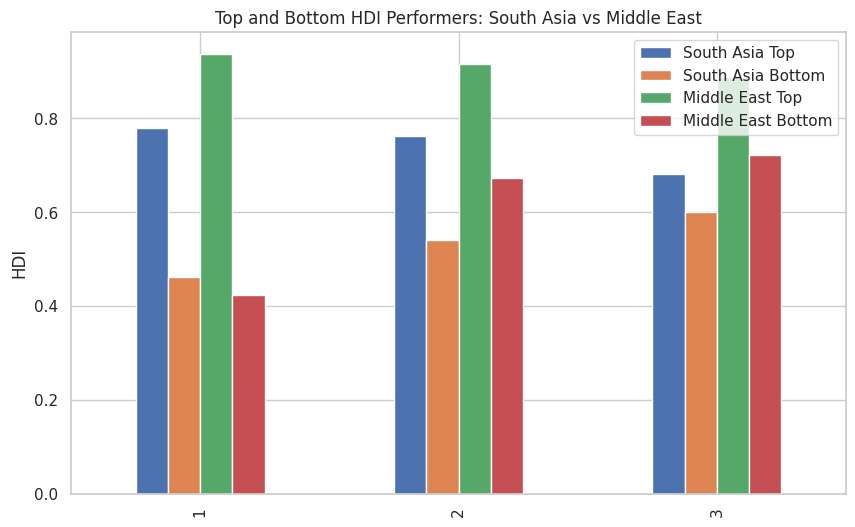

In [ ]:
# Preparing bar chart for top and bottom performers
top_bottom = pd.DataFrame({
    'South Asia Top': top3_sa['hdi'].values,
    'South Asia Bottom': bottom3_sa['hdi'].values,
    'Middle East Top': top3_me['hdi'].values,
    'Middle East Bottom': bottom3_me['hdi'].values
}, index=['1', '2', '3'])

top_bottom.plot(kind='bar', figsize=(10,6))
plt.ylabel("HDI")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.show()

In [ ]:
# Reading from File Path
file_path = "/content/drive/MyDrive/240085_KRISHASHRESTHA_ASSESMENT1/HDI_problem1B.csv"
hdi_df = pd.read_csv(file_path)

In [ ]:
# Normalizing column names: lowercase, strip spaces, replace spaces with underscores
hdi_df.columns = hdi_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
#Ensuring columns are numeric
for col in ['hdi', 'gender_development', 'life_expectancy', 'gross_inc_percap']:
    sa_df[col] = pd.to_numeric(sa_df[col], errors='coerce')
    me_df[col] = pd.to_numeric(me_df[col], errors='coerce')

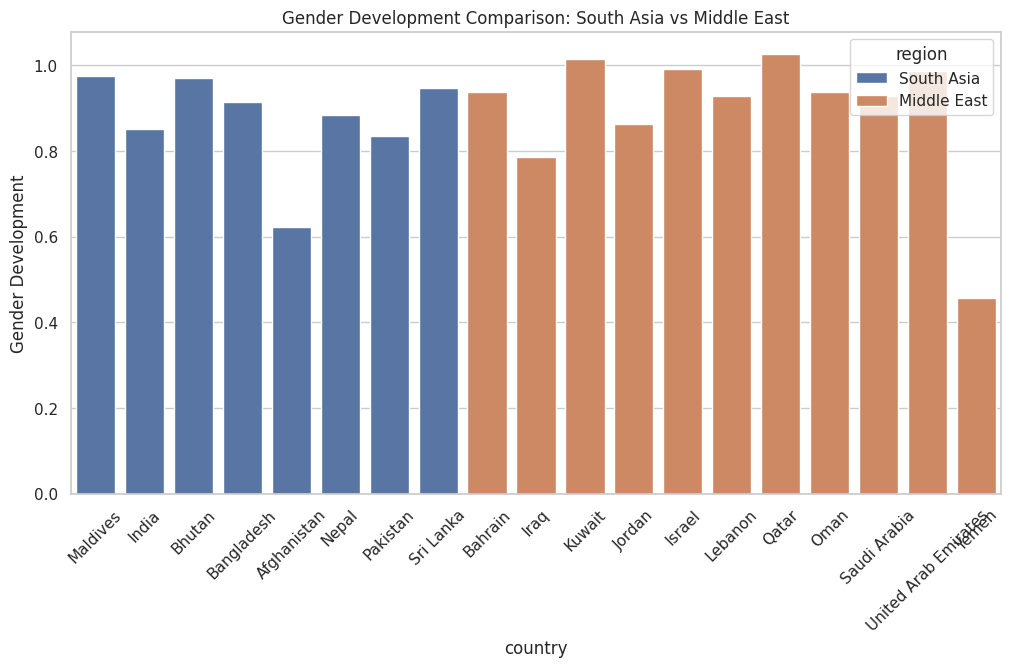

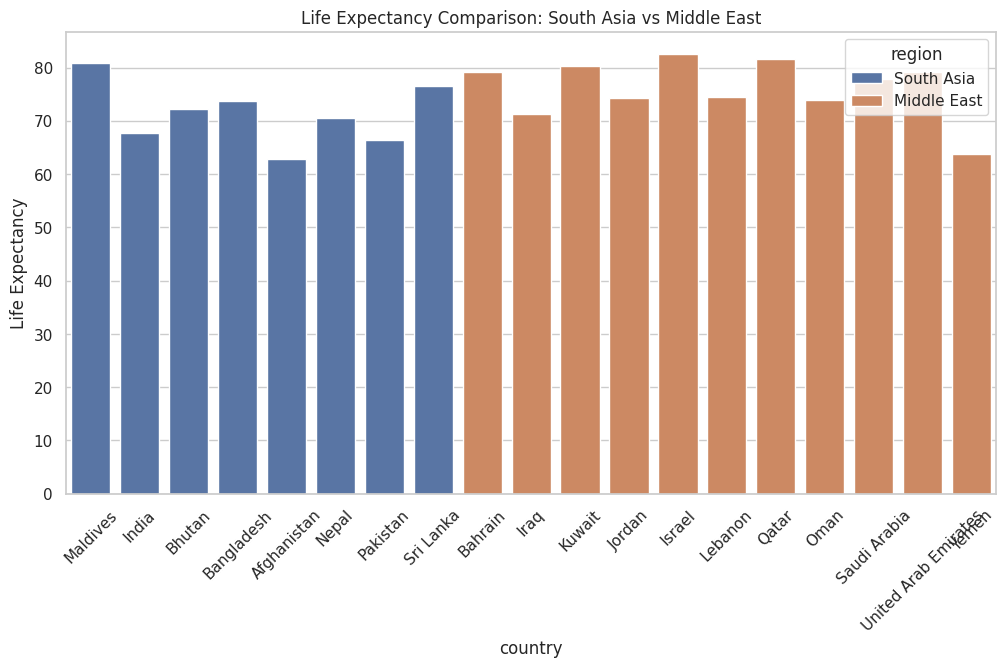

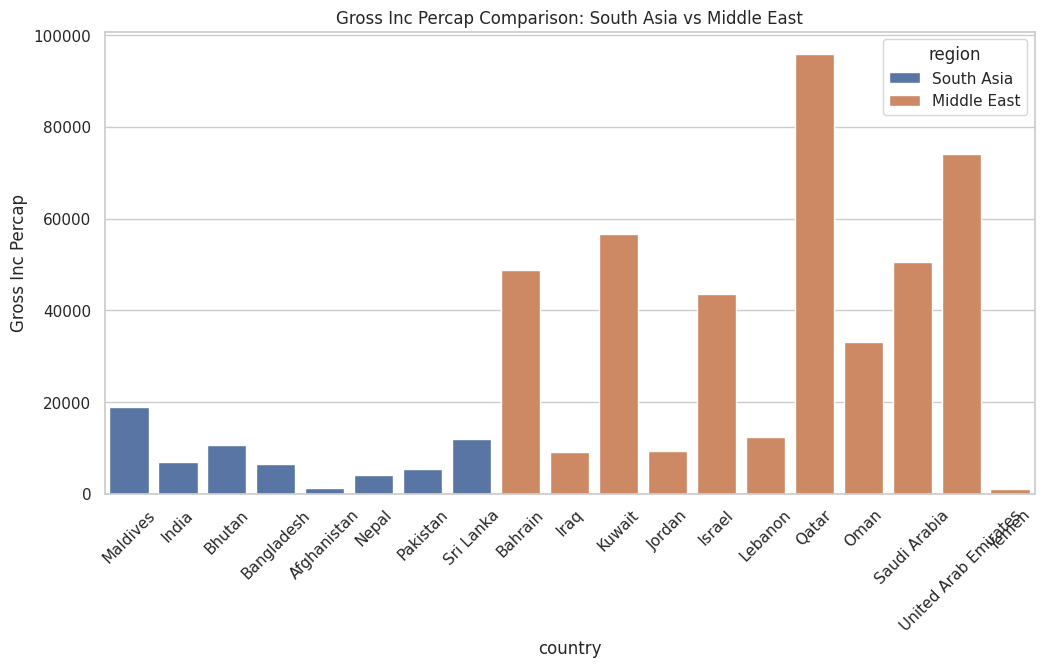

In [ ]:
#Task 4
# Metric Comparisons
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

for metric in metrics:
    plt.figure(figsize=(12,6))
    combined = pd.concat([
        sa_df[['country', metric]].assign(region='South Asia'),
        me_df[['country', metric]].assign(region='Middle East')
    ])
    sns.barplot(data=combined, x='country', y=metric, hue='region')
    plt.xticks(rotation=45)
    plt.title(f"{metric.replace('_',' ').title()} Comparison: South Asia vs Middle East")
    plt.ylabel(metric.replace('_',' ').title())
    plt.show()

In [ ]:
#Task 5
# HDI Disparity
for region_name, df_region in zip(['South Asia', 'Middle East'], [sa_df, me_df]):
    hdi_range = df_region['hdi'].max() - df_region['hdi'].min()
    cv = df_region['hdi'].std() / df_region['hdi'].mean()
    print(f"{region_name}: HDI Range = {hdi_range:.3f}, Coefficient of Variation = {cv:.3f}")


South Asia: HDI Range = 0.318, Coefficient of Variation = 0.167
Middle East: HDI Range = 0.513, Coefficient of Variation = 0.187



South Asia Correlations with HDI:
hdi                   1.000000
gender_development    0.884760
life_expectancy       0.928197
Name: hdi, dtype: float64


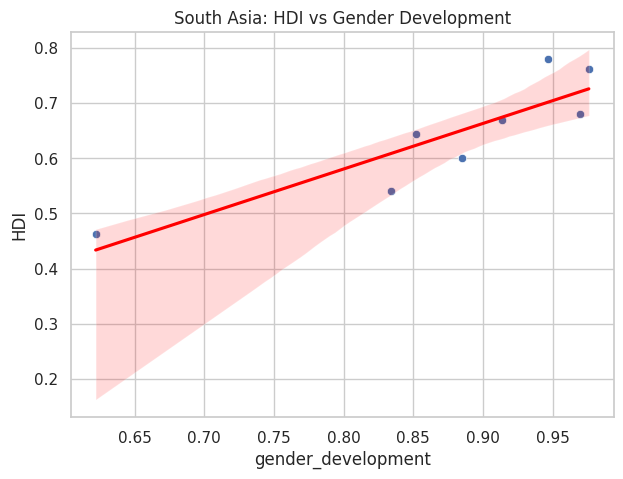

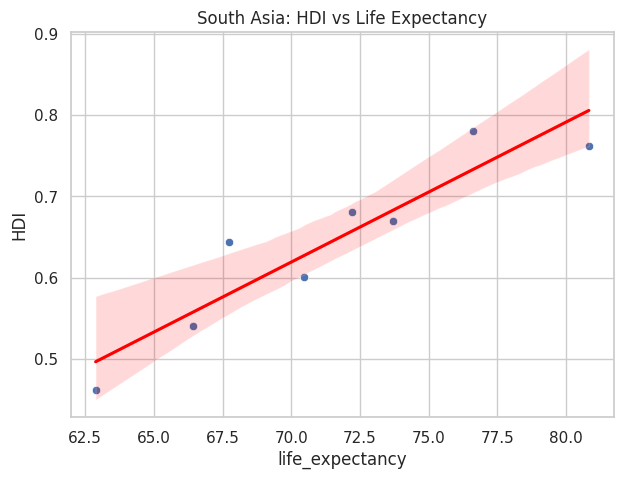


Middle East Correlations with HDI:
hdi                   1.000000
gender_development    0.936907
life_expectancy       0.944643
Name: hdi, dtype: float64


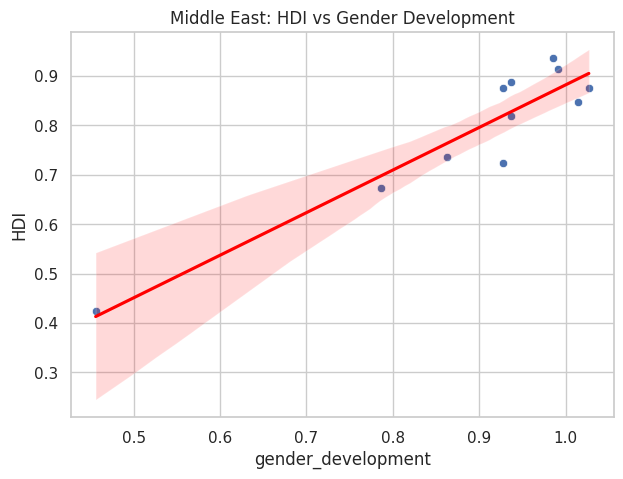

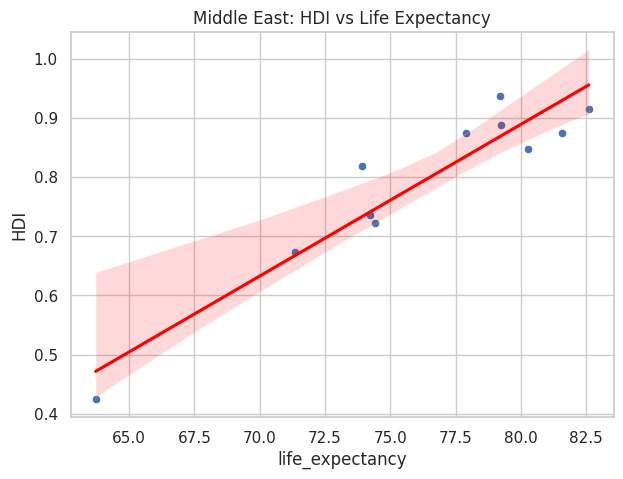

In [ ]:
#Task 6
#Correlation Analysis
for region_name, df_region in zip(['South Asia', 'Middle East'], [sa_df, me_df]):
    print(f"\n{region_name} Correlations with HDI:")
    print(df_region[['hdi','gender_development','life_expectancy']].corr()['hdi'])

    for metric in ['gender_development','life_expectancy']:
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df_region, x=metric, y='hdi')
        sns.regplot(data=df_region, x=metric, y='hdi', scatter=False, color='red')
        plt.title(f"{region_name}: HDI vs {metric.replace('_',' ').title()}")
        plt.ylabel('HDI')
        plt.show()

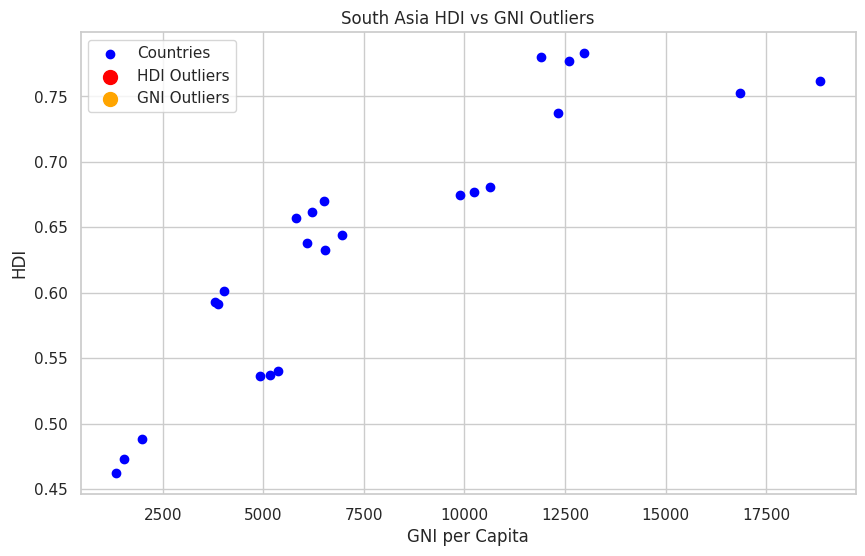

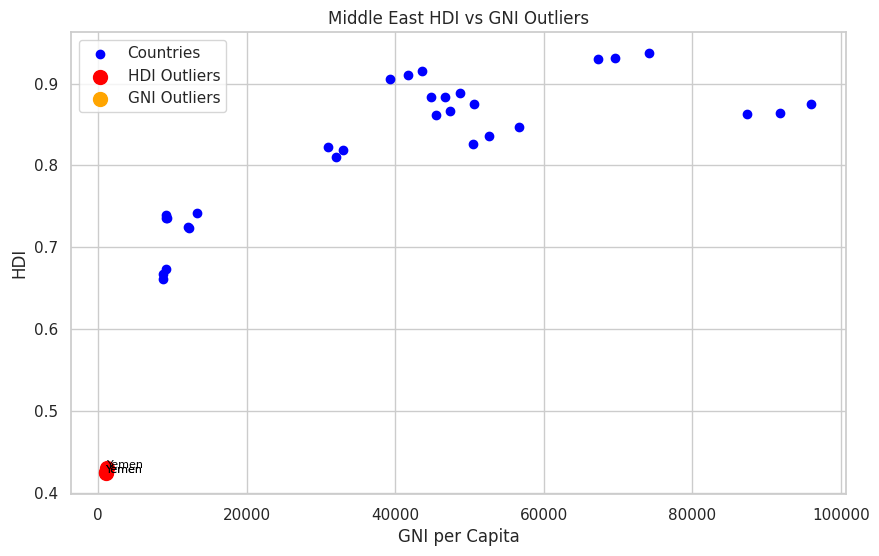

South Asia HDI Outliers:
 Empty DataFrame
Columns: [country, year, hdi]
Index: []

South Asia GNI Outliers:
 Empty DataFrame
Columns: [country, year, gross_inc_percap]
Index: []

Middle East HDI Outliers:
     country  year    hdi
568   Yemen  2020  0.430
569   Yemen  2021  0.425
570   Yemen  2022  0.424

Middle East GNI Outliers:
 Empty DataFrame
Columns: [country, year, gross_inc_percap]
Index: []


In [ ]:
#Task 7
#Outliner Detection

# Ensuring numeric columns are numeric
df['hdi'] = pd.to_numeric(df['hdi'], errors='coerce')
df['gross_inc_percap'] = pd.to_numeric(df['gross_inc_percap'], errors='coerce')

# South Asia and Middle East countries
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
               "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

sa_df = df[df['country'].isin(south_asia) & df['year'].isin([2020, 2021, 2022])]
me_df = df[df['country'].isin(middle_east) & df['year'].isin([2020, 2021, 2022])]

# Function to detect outliers using 1.5*IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Detecting outliers
sa_hdi_outliers = detect_outliers(sa_df, 'hdi')
sa_gni_outliers = detect_outliers(sa_df, 'gross_inc_percap')
me_hdi_outliers = detect_outliers(me_df, 'hdi')
me_gni_outliers = detect_outliers(me_df, 'gross_inc_percap')

# Plotting function
def plot_outliers(region_df, hdi_out, gni_out, region_name):
    plt.figure(figsize=(10,6))
    plt.scatter(region_df['gross_inc_percap'], region_df['hdi'], label='Countries', color='blue')
    plt.scatter(hdi_out['gross_inc_percap'], hdi_out['hdi'], label='HDI Outliers', color='red', s=100)
    plt.scatter(gni_out['gross_inc_percap'], gni_out['hdi'], label='GNI Outliers', color='orange', s=100)

    # Annotate outlier countries
    for _, row in pd.concat([hdi_out, gni_out]).iterrows():
        plt.text(row['gross_inc_percap'], row['hdi'], row['country'], fontsize=8, color='black')

    plt.title(f'{region_name} HDI vs GNI Outliers')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.legend()
    plt.show()

# South Asia plot
plot_outliers(sa_df, sa_hdi_outliers, sa_gni_outliers, 'South Asia')

# Middle East plot
plot_outliers(me_df, me_hdi_outliers, me_gni_outliers, 'Middle East')

# Printing outlier tables
print("South Asia HDI Outliers:\n", sa_hdi_outliers[['country', 'year', 'hdi']])
print("\nSouth Asia GNI Outliers:\n", sa_gni_outliers[['country', 'year', 'gross_inc_percap']])
print("\nMiddle East HDI Outliers:\n", me_hdi_outliers[['country', 'year', 'hdi']])
print("\nMiddle East GNI Outliers:\n", me_gni_outliers[['country', 'year', 'gross_inc_percap']])
